In [1]:
# url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


# columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


#  df = pd.read_csv(url, delim_whitespace=True, names=columns, na_values='?') 

 
# # 결측값 처리 (horsepower 컬럼에 결측값 존재)
# df = df.dropna()

# 해당 소스를 활용하여 연비(Mile per gallen)를 예측 

# mse를 구하라


# 1. ML (RF, DT, LR)

# 2. FCNN

# 3. 순환데이터로 변환후 CNN


# 각 단계별 검사후 다음단계 진행

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D

In [3]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", delim_whitespace=True, names=columns, na_values='?') 

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df= df.drop('car name', axis =1)

# 1. ML (RF, DT, LR)

In [8]:
y = df['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [9]:
X = df.drop('mpg', axis=1)
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 7), (79, 7), (313,), (79,))

In [11]:
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(pred_dt)
print(clf_dt.score(X_train, y_train))

[20.  29.  26.  36.  17.6 32.9 25.  22.3 13.  20.2 26.  31.  39.  26.
 15.  26.8 37.  12.  12.  15.  27.5 26.  17.5 22.5 31.  27.  20.2 24.
 18.  13.  18.2 18.5 30.  15.  22.3 21.  21.5 15.  30.9 32.9 19.  18.6
 22.3 18.  37.  36.  22.3 36.1 27.  24.  26.  22.  24.  22.  32.3 15.
 27.5 30.  32.7 23.  21.   9.  19.  32.  28.  30.9 15.  13.  17.5 23.
 32.  32.8 43.4 29.  29.5 29.  22.  23.  25. ]
1.0


In [12]:
mse = mean_squared_error(pred_dt, y_test)
print('평균제곱근오차', mse)

평균제곱근오차 17.913670886075952


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint, uniform

clf_rf = RandomForestRegressor(random_state=42)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

print(pred_rf)
print(clf_rf.score(X_train, y_train))

[18.748 29.369 24.381 33.566 19.915 31.342 25.322 27.9   13.86  20.86
 25.029 34.163 35.988 29.591 16.31  26.437 36.379 12.4   12.27  13.67
 24.444 24.755 17.241 21.295 30.035 27.408 20.978 26.204 20.86  12.73
 17.891 18.753 33.238 14.02  24.578 21.46  22.465 14.22  26.392 29.659
 18.195 21.021 30.076 18.286 37.543 33.692 26.786 35.043 28.063 25.145
 27.595 18.857 24.344 22.11  39.85  14.33  24.095 30.581 28.491 25.15
 19.306 13.31  20.65  30.166 27.079 25.585 14.747 14.905 17.195 26.765
 31.861 36.033 33.286 30.456 33.45  28.503 18.253 24.98  22.223]
0.984637202315632


In [14]:
mse = mean_squared_error(pred_rf, y_test)
print('평균제곱근오차', mse)

평균제곱근오차 10.640604329113929


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(pred_dt)
print(clf_lr.score(X_train, y_train))

[20.  29.  26.  36.  17.6 32.9 25.  22.3 13.  20.2 26.  31.  39.  26.
 15.  26.8 37.  12.  12.  15.  27.5 26.  17.5 22.5 31.  27.  20.2 24.
 18.  13.  18.2 18.5 30.  15.  22.3 21.  21.5 15.  30.9 32.9 19.  18.6
 22.3 18.  37.  36.  22.3 36.1 27.  24.  26.  22.  24.  22.  32.3 15.
 27.5 30.  32.7 23.  21.   9.  19.  32.  28.  30.9 15.  13.  17.5 23.
 32.  32.8 43.4 29.  29.5 29.  22.  23.  25. ]
0.8287380851972168


In [16]:
mse = mean_squared_error(pred_lr, y_test)
print('평균제곱근오차', mse)

평균제곱근오차 11.929209769157861


## FCNN

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model 3
model = Sequential()

model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))


model.add(Dense(64, activation='relu'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])  # 회귀에서는 MSE 사용
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [19]:
batch_size = 32

train_epochs = 50
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_split = 0.1, verbose=True, shuffle=True)

Epoch 1/50
9/9 [==============================] - 0s 14ms/step - loss: 11234.8096 - mean_squared_error: 11234.8096 - val_loss: 7187.5781 - val_mean_squared_error: 7187.5781
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 2962.5637 - mean_squared_error: 2962.5637 - val_loss: 1888.2559 - val_mean_squared_error: 1888.2559
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 1761.6587 - mean_squared_error: 1761.6587 - val_loss: 159.8093 - val_mean_squared_error: 159.8093
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 732.2015 - mean_squared_error: 732.2015 - val_loss: 145.8633 - val_mean_squared_error: 145.8633
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 336.9748 - mean_squared_error: 336.9748 - val_loss: 215.8085 - val_mean_squared_error: 215.8085
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 160.7183 - mean_squared_error: 160.7183 - val_loss: 162.2264 - val_mean_squared_error: 

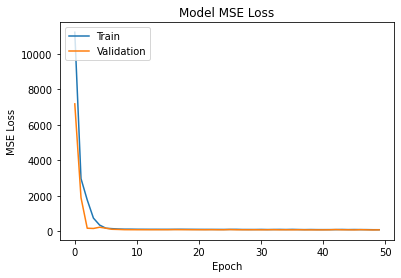

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')  # 'model loss'를 'Model MSE Loss'로 변경
plt.ylabel('MSE Loss')  # y축 레이블을 'MSE Loss'로 변경
plt.xlabel('Epoch')  # x축 레이블은 'Epoch' 그대로 유지
plt.legend(['Train', 'Validation'], loc='upper left')  # 범례 그대로 유지
plt.show()

MSE: 59.30401950287602
MAE: 5.947469712209097
R^2 Score: -0.1618993306596157


Text(0, 0.5, 'Predicted Values')

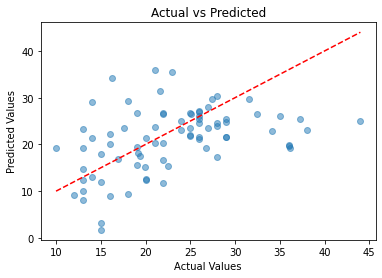

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델이 예측한 연속적인 값 (회귀)
predy = model.predict(X_test)

# 성능 지표 계산 (MSE, MAE, R^2)
mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# 예측값 vs 실제값 시각화
plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## 3. 순환데이터로 변환후 CNN

In [22]:
# split_sequence 함수
def split_sequence(df, n_steps):
    X, y = [], []
    for i in range(len(df) - n_steps):
        seq_x = df.iloc[i:i+n_steps, :1:].values  # 마지막 열(Rings)을 제외한 특징들
        seq_y = df.iloc[i+n_steps, 0]  # Rings (예측할 값)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [23]:
n_steps = 7

X, y = split_sequence(df, n_steps)
print("입력 데이터 (X):", X)
print("출력 데이터 (y):", y)

입력 데이터 (X): [[[18.]
  [15.]
  [18.]
  ...
  [17.]
  [15.]
  [14.]]

 [[15.]
  [18.]
  [16.]
  ...
  [15.]
  [14.]
  [14.]]

 [[18.]
  [16.]
  [17.]
  ...
  [14.]
  [14.]
  [14.]]

 ...

 [[26.]
  [22.]
  [32.]
  ...
  [27.]
  [27.]
  [44.]]

 [[22.]
  [32.]
  [36.]
  ...
  [27.]
  [44.]
  [32.]]

 [[32.]
  [36.]
  [27.]
  ...
  [44.]
  [32.]
  [28.]]]
출력 데이터 (y): [14.  14.  15.  15.  14.  15.  14.  24.  22.  18.  21.  27.  26.  25.
 24.  25.  26.  21.  10.  10.  11.   9.  27.  28.  25.  19.  16.  17.
 19.  18.  14.  14.  14.  14.  12.  13.  13.  18.  22.  19.  18.  23.
 28.  30.  30.  31.  35.  27.  26.  24.  25.  23.  20.  21.  13.  14.
 15.  14.  17.  11.  13.  12.  13.  19.  15.  13.  13.  14.  18.  22.
 21.  26.  22.  28.  23.  28.  27.  13.  14.  13.  14.  15.  12.  13.
 13.  14.  13.  12.  13.  18.  16.  18.  18.  23.  26.  11.  12.  13.
 12.  18.  20.  21.  22.  18.  19.  21.  26.  15.  16.  29.  24.  20.
 19.  15.  24.  20.  11.  20.  19.  15.  31.  26.  32.  25.  16.  16.
 18.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((246, 7, 1), (77, 7, 1), (246,), (77,), (62, 7, 1), (62,))

In [25]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]

In [26]:
# Model 3
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=48, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # 출력 레이어, 회귀이므로 'linear' 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])  # 회귀에서는 MSE 사용
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 16)             48        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 32)             1568      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 48)             6192      
_________________________________________________________________
flatten (Flatten)            (None, 48)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 392       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
____________________________________________________

In [27]:
batch_size = 16

train_epochs = 50
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/50
16/16 [==============================] - 0s 7ms/step - loss: 148.9832 - mean_squared_error: 148.9832 - val_loss: 78.7363 - val_mean_squared_error: 78.7363
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 50.4724 - mean_squared_error: 50.4724 - val_loss: 44.2798 - val_mean_squared_error: 44.2798
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 41.9170 - mean_squared_error: 41.9170 - val_loss: 42.4491 - val_mean_squared_error: 42.4491
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 37.3116 - mean_squared_error: 37.3116 - val_loss: 38.2396 - val_mean_squared_error: 38.2396
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 35.5805 - mean_squared_error: 35.5805 - val_loss: 38.4894 - val_mean_squared_error: 38.4894
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 35.2663 - mean_squared_error: 35.2663 - val_loss: 36.1876 - val_mean_squared_error: 36.1876
Epoch 7/50
16/

MSE: 22.09766924629617
MAE: 3.498696158768295
R^2 Score: 0.6484443221787632


Text(0, 0.5, 'Predicted Values')

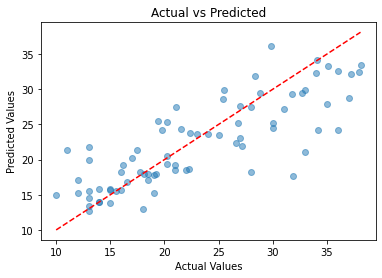

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델이 예측한 연속적인 값 (회귀)
predy = model.predict(X_test)

# 성능 지표 계산 (MSE, MAE, R^2)
mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# 예측값 vs 실제값 시각화
plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')